## Credit Delinquency Prediction


### Problem statement

Delinquency describes something or someone who fails to accomplish that which is required by law, duty, or contractual agreement, such as the failure to make a required payment or perform a particular action.

Credit scoring algorithms, which makes a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This use-case requires learners to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial delinquency in the next two years.

### Dataset description
The dataset consists of 150000 records and 11 features. Below are the 11 features and their descriptions.

|Feature|Description|
|-----|-----|
|SeriousDlqin2yrs|Person experienced 90 days past due delinquency or worse|
|RevolvingUtilizationOfUnsecuredLines| Total balance on credit cards and personal lines of credit|
|age| Age of borrower in years|
|NumberOfTime30-59DaysPastDueNotWorse| Number of times borrower has been 30-59 days past due but no worse in the last 2 years|
|DebtRatio| Monthly debt payments, alimony,living costs divided by monthy gross income|
|MonthlyIncome|Monthly Income|
|NumberOfOpenCreditLinesAndLoans| Number of Open loans (installment like car loan or mortgage) and Lines of credit|
|NumberOfTimes90DaysLate|Number of times borrower has been 90 days or more past due|
|NumberRealEstateLoansOrLines| Number of mortgage and real estate loans including home equity lines of credit|
|NumberOfTime60-89DaysPastDueNotWorse| Number of times borrower has been 60-89 days past due but no worse in the last 2 years|
|NumberOfDependents|Number of dependents in family excluding themselves|

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
#For display multiple output in their corresponding line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Task 1 :Load the data and get an overview of the data using `.describe()` and `.info()` method

In [3]:
df = pd.read_csv('fin_dataset.csv',index_col=0)

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


### Task 2 : Check for the skewness in the variables in `NumberOfDependents`  and `MonthlyIncome` by plotting a histogram.

(array([1.13218e+05, 2.90050e+04, 3.60800e+03, 2.09000e+02, 2.90000e+01,
        5.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

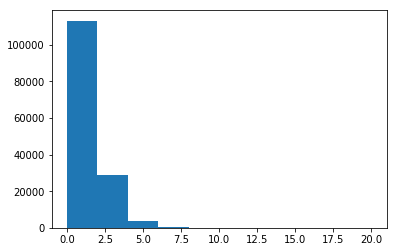

In [11]:
plt.hist(x=df['NumberOfDependents'])

(array([1.20252e+05, 7.00000e+00, 6.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.,  300875.,  601750.,  902625., 1203500., 1504375.,
        1805250., 2106125., 2407000., 2707875., 3008750.]),
 <a list of 10 Patch objects>)

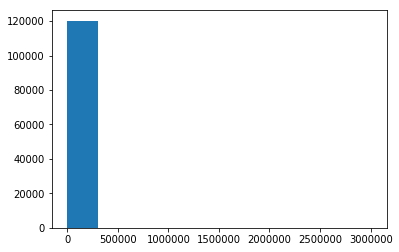

In [12]:
plt.hist(df['MonthlyIncome'])

### Task 3 :There is skewness in the feature `NumberOfDependents`. So let's replace the null values in this feature with the median and let's do the same for the feature `MonthlyIncome`

In [14]:
df.loc[df['NumberOfDependents'].isna(), 'NumberOfDependents'] = df['NumberOfDependents'].median()

In [15]:
df.loc[df['MonthlyIncome'].isna(), 'MonthlyIncome'] = df['MonthlyIncome'].median()

### Task 4: Check for the distribution of the target variable using a `countplot()`

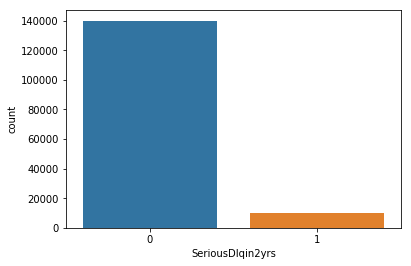

In [23]:
sns.countplot(df['SeriousDlqin2yrs'])

### Task 5 : Seperate the predictors and the target and split the data into training set and testing set. Keep the `test_size = 0.2` and the `random_state=42` 

In [28]:
X = df.iloc[ : , 1 : ]
y = df.iloc[ : , 0]

In [29]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [30]:
y.head()

1    1
2    0
3    0
4    0
5    0
Name: SeriousDlqin2yrs, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 6 : For a better method of inference, let's check for the correlation between different features by plotting a heatmap. The basic rule of feature selection is that we need to select features which are highly correlated to the dependent variable and also not highly correlated with each other as they show the same trend. 

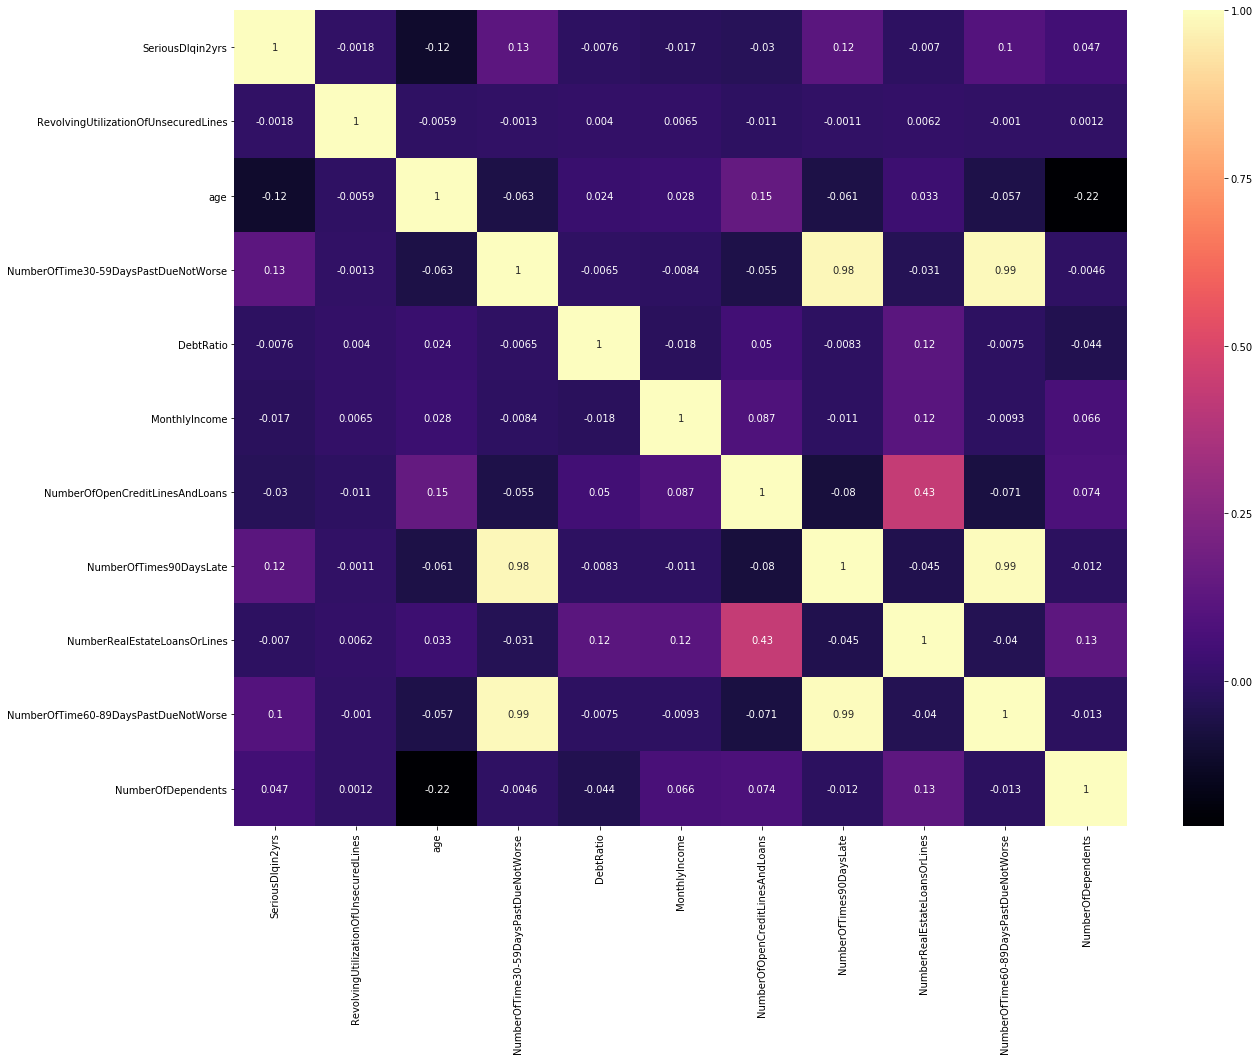

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='magma')

### Task 7 : We can see that the features `NumberOfTime60-89DaysPastDueNotWorse` is highly correlated along with the features `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`. So let's drop the features `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTime30-59DaysPastDueNotWorse` from the train as well as the test data

In [35]:
X_train.drop(columns=['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse'], inplace=True)
X_test.drop(columns=['NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse'], inplace=True)

### Task 8 : Fit a vanilla Logistic Regression model on the training set and predict on the test set and plot the confusion matrix, accuracy, precision, recall and F1_score for the predicted model 

In [36]:
def metric_data(y_true, y_pred):
    '''Method takes expected and actual output as parameters and provides all the relevant classification metrices'''
    #accuracy_score,classification_report,f1_score,confusion_matrix
    acc_score = accuracy_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1 = f1_score(y_true, y_pred)
    prec_score = precision_score(y_true, y_pred)
    rec_score = recall_score(y_true, y_pred)
    roc_score = roc_auc_score(y_true, y_pred)
    classifn_report = classification_report(y_true, y_pred)
    print('Accuracy is ',acc_score)
    print('Precision Score is ', prec_score)
    print('F1 Score is ', f1)
    print('Recall Score is ', rec_score)
    print('Area under ROC Curve is ', roc_score)
    print('Confusion Matrix is ')
    print(tp, fp)
    print(fn, tn)
    print('Classification Report is ')
    print(classifn_report)

In [37]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

metric_data(y_test, y_pred_log_reg)

### Task 9 : Set the parameter `class_weight=balanced` inside Logistic Regression and check for the metrics calculated above and also the confusion matrix

In [43]:
log_reg_balanced = LogisticRegression(class_weight='balanced')

log_reg_balanced.fit(X_train, y_train)

y_pred_log_reg_bal = log_reg_balanced.predict(X_test)

metric_data(y_test, y_pred_log_reg_bal)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy is  0.6890333333333334
Precision Score is  0.1251652262328419
F1 Score is  0.208803324569587
Recall Score is  0.6293456032719836
Area under ROC Curve is  0.6612710044601253
Confusion Matrix is 
1231 8604
725 19440
Classification Report is 
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     28044
           1       0.13      0.63      0.21      1956

    accuracy                           0.69     30000
   macro avg       0.54      0.66      0.51     30000
weighted avg       0.91      0.69      0.77     30000



### Task 10 : Perform Random Undersampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [46]:
under_sample = RandomUnderSampler(random_state=42)

In [48]:
X_under_sample, y_under_sample = under_sample.fit_resample(X_train, y_train)

In [53]:
log_reg_under_sampled = LogisticRegression()

log_reg_under_sampled.fit(X_under_sample, y_under_sample)

y_pred_under_sampled = log_reg_under_sampled.predict(X_test)

metric_data(y_test, y_pred_under_sampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy is  0.6882666666666667
Precision Score is  0.12532928064842958
F1 Score is  0.20920006764755625
Recall Score is  0.6324130879345603
Area under ROC Curve is  0.6622877021472829
Confusion Matrix is 
1237 8633
719 19411
Classification Report is 
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     28044
           1       0.13      0.63      0.21      1956

    accuracy                           0.69     30000
   macro avg       0.54      0.66      0.51     30000
weighted avg       0.91      0.69      0.77     30000



### Task 11 : Perform Tomek Undersampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [55]:
tomek_sampling = TomekLinks()

In [56]:
X_tomek_sampling, y_tomek_sampling = tomek_sampling.fit_resample(X_train, y_train)

In [57]:
log_reg_tomek_sampling = LogisticRegression()

log_reg_tomek_sampling.fit(X_tomek_sampling, y_tomek_sampling)

y_pred_tomek_sampling = log_reg_tomek_sampling.predict(X_test)

metric_data(y_test, y_pred_tomek_sampling)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy is  0.9349
Precision Score is  0.5283018867924528
F1 Score is  0.027874564459930314
Recall Score is  0.014314928425357873
Area under ROC Curve is  0.506711736071187
Confusion Matrix is 
28 25
1928 28019
Classification Report is 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.53      0.01      0.03      1956

    accuracy                           0.93     30000
   macro avg       0.73      0.51      0.50     30000
weighted avg       0.91      0.93      0.91     30000



### Task 12 : Perform Random Oversampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [59]:
over_sample = RandomOverSampler(random_state=42)

In [60]:
X_over_sampled, y_over_sampled = over_sample.fit_resample(X_train, y_train)

In [61]:
log_reg_over_sampling = LogisticRegression()

log_reg_over_sampling.fit(X_over_sampled, y_over_sampled)

y_pred_over_sampling = log_reg_over_sampling.predict(X_test)

metric_data(y_test, y_pred_over_sampling)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy is  0.6977333333333333
Precision Score is  0.12779987439815785
F1 Score is  0.21216333622936578
Recall Score is  0.6242331288343558
Area under ROC Curve is  0.6635464602950841
Confusion Matrix is 
1221 8333
735 19711
Classification Report is 
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     28044
           1       0.13      0.62      0.21      1956

    accuracy                           0.70     30000
   macro avg       0.55      0.66      0.51     30000
weighted avg       0.91      0.70      0.77     30000



### Task 13 : Perform SMOTE on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [62]:
smote = SMOTE(random_state=42)

In [63]:
X_smote_sampled, y_smote_sampled = smote.fit_resample(X_train, y_train)

In [64]:
log_reg_smote_sampling = LogisticRegression()

log_reg_smote_sampling.fit(X_smote_sampled, y_smote_sampled)

y_pred_smote_sampling = log_reg_smote_sampling.predict(X_test)

metric_data(y_test, y_pred_smote_sampling)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy is  0.7315333333333334
Precision Score is  0.13805792972459638
F1 Score is  0.22408477842003852
Recall Score is  0.5945807770961146
Area under ROC Curve is  0.6678331071331379
Confusion Matrix is 
1163 7261
793 20783
Classification Report is 
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     28044
           1       0.14      0.59      0.22      1956

    accuracy                           0.73     30000
   macro avg       0.55      0.67      0.53     30000
weighted avg       0.91      0.73      0.80     30000

